In [3]:
import numpy as numpy
import pandas as pd

from matplotlib.pyplot import subplots
import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

import seaborn as sns



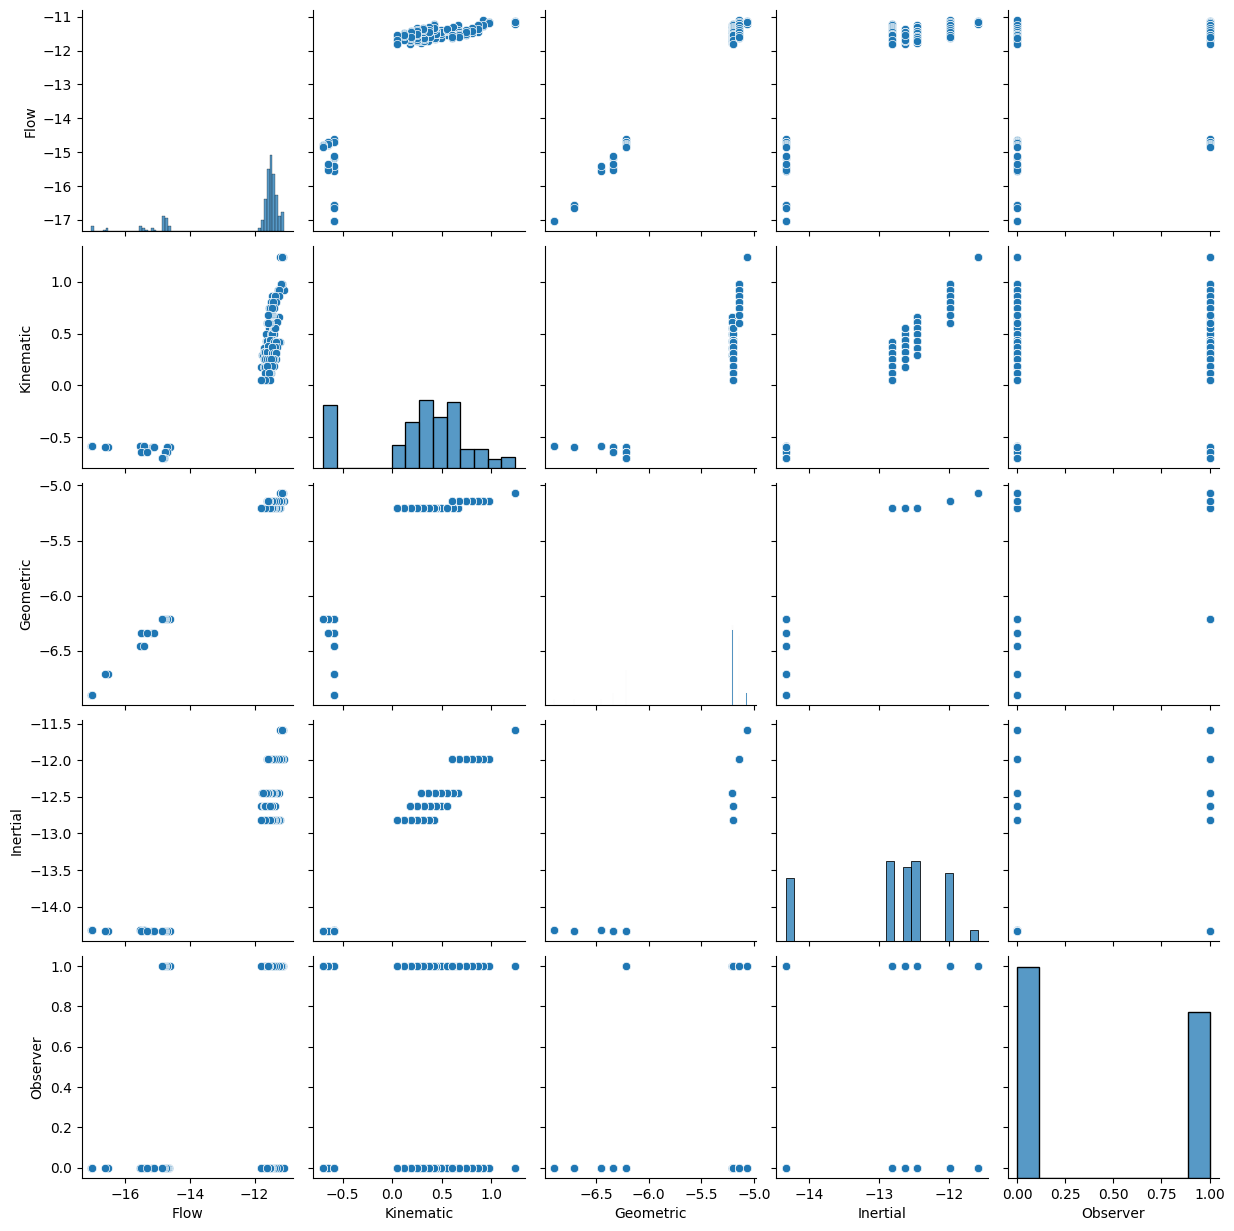

In [6]:
df = pd.read_csv("Small-diameter-flow.csv", index_col=0)
sns.pairplot(df)

In [7]:
pd.DataFrame.corr(df)

,Flow,Kinematic,Geometric,Inertial,Observer
Flow,1.000000,0.863403,0.995794,0.903310,0.181490
Kinematic,0.863403,1.000000,0.863135,0.968671,0.103227
Geometric,0.995794,0.863135,1.000000,0.918330,0.175199
Inertial,0.903310,0.968671,0.918330,1.000000,0.121981
Observer,0.181490,0.103227,0.175199,0.121981,1.000000


In [8]:
y=df["Flow"]
minus_flow=df.columns.drop(['Flow'])
Xmf=MS(minus_flow).fit_transform(df)
model1=sm.OLS(y, Xmf)
result5=model1.fit()
summarize(model1.fit())


,coef,std err,t,P>|t|
intercept,-2.5838,0.422,-6.127,0.000
Kinematic,0.8700,0.049,17.911,0.000
Geometric,3.6032,0.033,108.668,0.000
Inertial,-0.7519,0.039,-19.174,0.000
Observer,0.0169,0.012,1.458,0.146


In [9]:
result5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Flow   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.690e+04
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          2.20e-244
Time:                        17:20:30   Log-Likelihood:                 223.67
No. Observations:                 198   AIC:                            -437.3
Df Residuals:                     193   BIC:                            -420.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.5838      0.422     -6.127      0.000      -3.416      -1.752
Kinematic      0.8700      0.049     17.911      0.000       0.774       0.966
Geometric      3.6032      0.033    108.668      0.000       3.538       3.669
Inertial      -0.7519      0.039    -19.174      0.000      -0.829      -0.675
Observer       0.0169      0.012      1.458      0.146      -0.006       0.040
==============================================================================
Omnibus:                        5.125   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.786
Skew:                          -0.318   Prob(JB):                       0.0914
Kurtosis:                       3.420   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""